In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#from statsmodels.tsa.seasonal import seasonal_decompose

#adjust figure size
# from pylab import rcParams
# rcParams['figure.figsize'] = 10, 5

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
train_o = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')

test_o = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')

In [3]:
# train_x = train_o.copy()

# test_c = test_o.copy()

In [4]:
train = train_o.copy()

test = test_o.copy()

Examination of the target variable indicates a more normal distribution after taking the log transformation.
- The transformation has a low skewness, however the kurtosis is also lower than the normal distribution (3).
    - This means that the distribution has shorter tails and a lower peak. However, the transformation is more normal.  

Skewness before log transformation:  1.8828757597682129
Kurtosis before log transformation:  6.536281860064529
-------------------------------------------------------
Skewness after log transformation:  0.12133506220520406
Kurtosis after log transformation:  0.8095319958036296


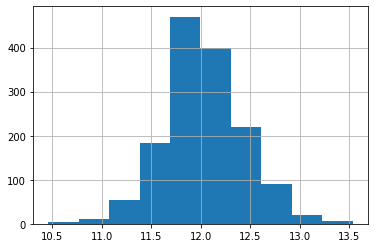

In [5]:
# train.SalePrice.hist() # Right skewed

np.log(train.SalePrice).hist() # better distribution

print("Skewness before log transformation: ", train['SalePrice'].skew())
print("Kurtosis before log transformation: ", train['SalePrice'].kurt())
print("-" * 55)
print("Skewness after log transformation: ", np.log(train['SalePrice']).skew())
print("Kurtosis after log transformation: ", np.log(train['SalePrice']).kurt())

In [6]:
y_target = train.SalePrice

y_log = np.log(train.SalePrice)

In [7]:
print("The training dimensions: ", train.shape)
print("The test dimensions: ", test.shape) #price column missing and 1 record missing

The training dimensions:  (1460, 81)
The test dimensions:  (1459, 80)


In [8]:
train.drop("SalePrice", axis = 1, inplace = True)

In [9]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [10]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [11]:
np.sum(train.isnull())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## Missing Values

**LotFrontage**
- Values appear to be MCAR, meaning, no other features in the data set appear to describe why the value would be missing.
- Upon exploration, I determined to group by Neighborhood and take the median LotFrontage value.
    - I chose median because it was more conservative than the mean value for most neighborhoods.

Skewness before log transformation:  2.163569142324884
Kurtosis before log transformation:  17.452867259818404
-------------------------------------------------------
Skewness after log transformation:  -0.763152015613897
Kurtosis after log transformation:  2.3542685396348775


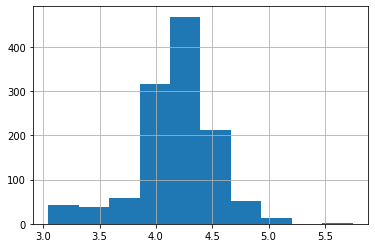

In [12]:
# train.LotFrontage.hist() # Right skewed

np.log(train.LotFrontage).hist() # better distribution

print("Skewness before log transformation: ", train['LotFrontage'].skew())
print("Kurtosis before log transformation: ", train['LotFrontage'].kurt())
print("-" * 55)
print("Skewness after log transformation: ", np.log(train['LotFrontage']).skew())
print("Kurtosis after log transformation: ", np.log(train['LotFrontage']).kurt())

In [13]:
## train[["LotFrontage"]].isnull().sum() # 259

train['LotFrontage'].isnull().groupby(train['Neighborhood']).sum()

Neighborhood
Blmngtn     3.0
Blueste     0.0
BrDale      0.0
BrkSide     7.0
ClearCr    15.0
CollgCr    24.0
Crawfor    10.0
Edwards     8.0
Gilbert    30.0
IDOTRR      3.0
MeadowV     2.0
Mitchel    13.0
NAmes      39.0
NPkVill     2.0
NWAmes     28.0
NoRidge     8.0
NridgHt     1.0
OldTown     4.0
SWISU       2.0
Sawyer     26.0
SawyerW     9.0
Somerst     8.0
StoneBr     5.0
Timber      8.0
Veenker     4.0
Name: LotFrontage, dtype: float64

In [14]:
hood_lf_med = train[["LotFrontage", "Neighborhood"]].groupby("Neighborhood")["LotFrontage"].median()

hood_lf_mean = train[["LotFrontage", "Neighborhood"]].groupby("Neighborhood")["LotFrontage"].mean()

lf_calc = pd.merge(hood_lf_med,
        hood_lf_mean,
        on = "Neighborhood")

lf_calc["Greater"] = lf_calc.LotFrontage_x > lf_calc.LotFrontage_y

lf_calc

# print(len(lf_calc.LotFrontage_x)) # 25 observations
# print(np.mean(lf_calc.Greater)) # about 28% true or 7 values where mean was less than median


,LotFrontage_x,LotFrontage_y,Greater
Neighborhood,,,
Blmngtn,43.0,47.142857,False
Blueste,24.0,24.000000,False
BrDale,21.0,21.562500,False
BrkSide,52.0,57.509804,False
ClearCr,80.0,83.461538,False
CollgCr,70.0,71.682540,False
Crawfor,74.0,71.804878,True
Edwards,65.5,68.217391,False
Gilbert,65.0,79.877551,False


**Missing Categorical Values**

There were several categorical variables that contained NA values that actually represent the lack of a feature. In order to calculate these correctly and account for them in the regression model, they have been filled with "None." The missing masonry veneer area were filled with 0 since the did not have a veneer type. the missing lot frontage was imputed using the median lot frontage values because it was slightly more conservative than the mean.


In [15]:
def fill_misc_na(data):
    
    data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())
    
    data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
    
    

In [16]:
fill_misc_na(train)

In [17]:
def fill_na(data, column):
    
    for col in column:
        
        data[col] = data[col].fillna("None")

        print("%s now has %d  NaN" % (col, np.sum(data[col].isnull())))
        print("-" * 50 + "\n")
    
    #return data

In [18]:
fill_na(train, ["Alley"])

Alley now has 0  NaN
--------------------------------------------------



In [19]:
# train.Alley = train.Alley.fillna('None')

# sum(train.Alley.isnull())

In [20]:
bsmnt = [ 'BsmtQual', 'BsmtCond','BsmtExposure',
         'BsmtFinType1', 'BsmtFinType2' ]

fill_na(train, bsmnt)

BsmtQual now has 0  NaN
--------------------------------------------------

BsmtCond now has 0  NaN
--------------------------------------------------

BsmtExposure now has 0  NaN
--------------------------------------------------

BsmtFinType1 now has 0  NaN
--------------------------------------------------

BsmtFinType2 now has 0  NaN
--------------------------------------------------



In [21]:
# 'PoolQC','Fence', 'MiscFeature', left out for now
fire_garage = ['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

fill_na(train, fire_garage)

FireplaceQu now has 0  NaN
--------------------------------------------------

GarageType now has 0  NaN
--------------------------------------------------

GarageFinish now has 0  NaN
--------------------------------------------------

GarageQual now has 0  NaN
--------------------------------------------------

GarageCond now has 0  NaN
--------------------------------------------------



In [22]:
train.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'None', 'Basment',
       '2Types'], dtype=object)

In [23]:
train.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

### Feature Engineering & Feature Selection

Upon examination of the data, there are some features we don't want included. Decisions were determined based on group discussions and initial EDA. 

In [24]:
# 'Electrical'
train.drop(['Id', 'MSSubClass', 'Alley', 'Utilities', 'LotConfig',
            'LandSlope', 'Condition1', 'Condition2', 'Heating', 'HeatingQC',
            'PavedDrive', 'PoolArea', 'PoolQC',
            'Fence', 'MiscFeature', "MiscVal", 'MoSold', 'SaleType', 'SaleCondition'],
           axis = 1, inplace = True)

**Total Home Square Feet**

Here, I combined the the variables for square feet into one `total_sqft` variable. 


In [25]:
def ttl_sf(data):
    ##makes a total square feet variable
    data["total_sqft"] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
    
    data.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF', 'LowQualFinSF', 
               'GrLivArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis = 1, inplace = True)
    
    #return data

In [26]:
ttl_sf(train)

In [27]:
train.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,YrSold,total_sqft
0,RL,65.0,8450,Pave,Reg,Lvl,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,0,61,0,0,0,2008,2566
1,RL,80.0,9600,Pave,Reg,Lvl,Veenker,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,298,0,0,0,0,2007,2524
2,RL,68.0,11250,Pave,IR1,Lvl,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,0,42,0,0,0,2008,2706
3,RL,60.0,9550,Pave,IR1,Lvl,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Y,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,0,35,272,0,0,2006,2473
4,RL,84.0,14260,Pave,IR1,Lvl,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,Y,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,192,84,0,0,0,2008,3343


**Garage & Lot Features**

GarageArea was dropped in favor of GarageCars because the two variables were highly correlated with each other. GarageCars had a slightly higher correlation with the target. The age of the garage was calculated by subtracting the year it was built from the year it was sold. Additionally, I modified the GarageTypes to be bucketed into the following categories: attached, detached, other, or none. 

Also for exploration, I made Street a binary variable for whether or not it was gravel or paved. LotShape was made binary by combining lots that were irregular

In [28]:
def garage_lot(data):
    
    ##makes Street Binary
    data['Street'] = data['Street'].apply(lambda x: 0 if x == "Grvl" else 1)
    
    ##makes LotShape Binary
    data['LotShape'] = data['LotShape'].apply(lambda x: 0 if x == "Reg" else 1)
    
    ##makes LandContour Binary
    data['LandContour'] = data['LandContour'].apply(lambda x: 0 if x == "Lvl" else 1)
    
    ##creates garage age
    data['garage_age'] = data['YrSold'] - data['GarageYrBlt']
    
    ##categories Garage type into smaller categories
    data.GarageType = data['GarageType'].apply(lambda x: 'Attchd' if x == 'Attchd' 
                         else ('Detchd' if x == 'Detchd' else ( 'None' if x == 'None' else 'Other') ) )



    
    
    data.drop(['GarageYrBlt', 'GarageFinish', 'GarageArea', 
               'GarageQual', 'GarageCond'], axis = 1, inplace = True)

In [29]:
train.LotArea

0         8450
1         9600
2        11250
3         9550
4        14260
5        14115
6        10084
7        10382
8         6120
9         7420
10       11200
11       11924
12       12968
13       10652
14       10920
15        6120
16       11241
17       10791
18       13695
19        7560
20       14215
21        7449
22        9742
23        4224
24        8246
25       14230
26        7200
27       11478
28       16321
29        6324
30        8500
31        8544
32       11049
33       10552
34        7313
35       13418
36       10859
37        8532
38        7922
39        6040
40        8658
41       16905
42        9180
43        9200
44        7945
45        7658
46       12822
47       11096
48        4456
49        7742
50       13869
51        6240
52        8472
53       50271
54        7134
55       10175
56        2645
57       11645
58       13682
59        7200
60       13072
61        7200
62        6442
63       10300
64        9375
65        9591
66       1

In [30]:
train.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,YrSold,total_sqft
0,RL,65.0,8450,Pave,Reg,Lvl,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,0,61,0,0,0,2008,2566
1,RL,80.0,9600,Pave,Reg,Lvl,Veenker,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,298,0,0,0,0,2007,2524
2,RL,68.0,11250,Pave,IR1,Lvl,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,0,42,0,0,0,2008,2706
3,RL,60.0,9550,Pave,IR1,Lvl,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Y,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,0,35,272,0,0,2006,2473
4,RL,84.0,14260,Pave,IR1,Lvl,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,Y,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,192,84,0,0,0,2008,3343


In [31]:
garage_lot(train)

In [32]:
train.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,YrSold,total_sqft,garage_age
0,RL,65.0,8450,1,0,0,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2,0,61,0,0,0,2008,2566,5.0
1,RL,80.0,9600,1,0,0,Veenker,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,2,298,0,0,0,0,2007,2524,31.0
2,RL,68.0,11250,1,1,0,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2,0,42,0,0,0,2008,2706,7.0
3,RL,60.0,9550,1,1,0,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Y,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,3,0,35,272,0,0,2006,2473,8.0
4,RL,84.0,14260,1,1,0,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,Y,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,3,192,84,0,0,0,2008,3343,8.0


**Outside / Deck Square Feet**

Similar to above, I combined all deck square feet (enclosed or not) into a single variable.

In [33]:
def out_sf(data):
    ## makes a deck/porch square feet variable
    data['deck_sqft'] = data['WoodDeckSF'] + data['OpenPorchSF'] + \
    data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch']
    
    data.drop(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                     '3SsnPorch', 'ScreenPorch'], axis = 1, inplace = True)

In [34]:
out_sf(train)

In [35]:
train.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageCars,YrSold,total_sqft,garage_age,deck_sqft
0,RL,65.0,8450,1,0,0,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2,2008,2566,5.0,61
1,RL,80.0,9600,1,0,0,Veenker,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,2,2007,2524,31.0,298
2,RL,68.0,11250,1,1,0,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2,2008,2706,7.0,42
3,RL,60.0,9550,1,1,0,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Y,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,3,2006,2473,8.0,307
4,RL,84.0,14260,1,1,0,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,Y,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,3,2008,3343,8.0,276


**Building Type, Home Style, & Rooms**

In [36]:
def bld_rooms(data):
    ##makes building type binary (single fam or not)
    data['BldgType'] = data['BldgType'].apply(lambda x: 0 if x == '1Fam' else 1)
    
    ##catgeorizes housing style into 3 categories
    data['HouseStyle'].apply(lambda x: '1Story' if x == '1Story' else ('2Story' if x == '2Story' else 'Other' ))
    
    ##makes roof style binary (gable or not)
    data['RoofStyle'] = data['RoofStyle'].apply(lambda x: 0 if x == 'Gable' else 1)
    
    ##total bath rooms
    data['total_bath'] = data['BsmtFullBath'] + data['FullBath'] + (data['BsmtHalfBath'] * 0.5) + (data['HalfBath'] * 0.5)
    
    ##creates total rooms other above ground by removing kitchens and bedrooms
    data['abv_rm_other'] = data['TotRmsAbvGrd'] - data['BedroomAbvGr'] - data['KitchenAbvGr']
    
    ##has fireplace (y = 1 / n = 0)
    data['Fireplaces'] = data['Fireplaces'].apply(lambda x: 0 if x == 0 else 1)
    
    ##central air (y = 1 / n = 0)
    data['CentralAir'] = data['CentralAir'].apply(lambda x: 0 if x == 'No' else 1)
    
    ##SBrkr (y = 1 / n = 0)
    data['Electrical'] = data['Electrical'].apply(lambda x: 1 if x == 'SBrkr' else 0)
    
    
    data.drop(['RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
               'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure',
              'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
               'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Functional', 'FireplaceQu'], axis = 1, inplace = True)
    #BsmtQual

In [37]:
bld_rooms(train)

In [38]:
train.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,BsmtQual,CentralAir,Electrical,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageType,GarageCars,YrSold,total_sqft,garage_age,deck_sqft,total_bath,abv_rm_other
0,RL,65.0,8450,1,0,0,CollgCr,0,2Story,7,5,2003,2003,0,196.0,Gd,1,1,3,1,Gd,0,Attchd,2,2008,2566,5.0,61,3.5,4
1,RL,80.0,9600,1,0,0,Veenker,0,1Story,6,8,1976,1976,0,0.0,Gd,1,1,3,1,TA,1,Attchd,2,2007,2524,31.0,298,2.5,2
2,RL,68.0,11250,1,1,0,CollgCr,0,2Story,7,5,2001,2002,0,162.0,Gd,1,1,3,1,Gd,1,Attchd,2,2008,2706,7.0,42,3.5,2
3,RL,60.0,9550,1,1,0,Crawfor,0,2Story,7,5,1915,1970,0,0.0,TA,1,1,3,1,Gd,1,Detchd,3,2006,2473,8.0,307,2.0,3
4,RL,84.0,14260,1,1,0,NoRidge,0,2Story,8,5,2000,2000,0,350.0,Gd,1,1,4,1,Gd,1,Attchd,3,2008,3343,8.0,276,3.5,4


**Home Age & Remodels**

Below, I calculcated the estimated age of the home at the time of the sale. Additionally, I created a dummy variable to capture whether or not a home was remodeled.

In [39]:
def home_years(data):
    data["has_remod"] = data['YearRemodAdd'] - data['YearBuilt']
    
    data["has_remod"] = data["has_remod"].apply( lambda x: 1 if x > 0 else 0 )
    
    data["home_age"] = data['YrSold'] - data['YearBuilt']
    
    data.drop(['YearRemodAdd', 'YrSold', 'YearBuilt'], axis = 1, inplace = True)


In [40]:
home_years(train)

**Outlier Examination**

While removing the outliers from square footage; removal of outliers from the masonry veneer type decreased predicative modeling scores for both the train and test sets. Similarly, decreases were observed when removing outliers form lot frontage and lot area.

In [42]:
# plt.scatter(train.total_sqft, train_x.SalePrice)

In [43]:
# sqft = train[['total_sqft']]
# sqft['SalePrice'] = train_x['SalePrice']

# sqft = sqft.loc[sqft.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [44]:
# plt.scatter(sqft.total_sqft, sqft.SalePrice)

# print(sqft.total_sqft.max())

This filters outliers from the total square foot variable since they do not capture the general trend in the regression model. 

In [45]:
train[train['total_sqft'] < 5000]

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,MasVnrArea,BsmtQual,CentralAir,Electrical,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageType,GarageCars,total_sqft,garage_age,deck_sqft,total_bath,abv_rm_other,has_remod,home_age
0,RL,65.0,8450,1,0,0,CollgCr,0,2Story,7,5,0,196.0,Gd,1,1,3,1,Gd,0,Attchd,2,2566,5.0,61,3.5,4,0,5
1,RL,80.0,9600,1,0,0,Veenker,0,1Story,6,8,0,0.0,Gd,1,1,3,1,TA,1,Attchd,2,2524,31.0,298,2.5,2,0,31
2,RL,68.0,11250,1,1,0,CollgCr,0,2Story,7,5,0,162.0,Gd,1,1,3,1,Gd,1,Attchd,2,2706,7.0,42,3.5,2,1,7
3,RL,60.0,9550,1,1,0,Crawfor,0,2Story,7,5,0,0.0,TA,1,1,3,1,Gd,1,Detchd,3,2473,8.0,307,2.0,3,1,91
4,RL,84.0,14260,1,1,0,NoRidge,0,2Story,8,5,0,350.0,Gd,1,1,4,1,Gd,1,Attchd,3,3343,8.0,276,3.5,4,0,8
5,RL,85.0,14115,1,1,0,Mitchel,0,1.5Fin,5,5,0,0.0,Gd,1,1,1,1,TA,0,Attchd,2,2158,16.0,390,2.5,3,1,16
6,RL,75.0,10084,1,0,0,Somerst,0,1Story,8,5,0,186.0,Ex,1,1,3,1,Gd,1,Attchd,2,3380,3.0,312,3.0,3,1,3
7,RL,69.0,10382,1,1,0,NWAmes,0,2Story,7,6,0,240.0,Gd,1,1,3,1,TA,1,Attchd,2,3197,36.0,667,3.5,3,0,36
8,RM,51.0,6120,1,0,0,OldTown,0,1.5Fin,7,5,0,0.0,TA,1,0,2,2,TA,1,Detchd,2,2726,77.0,295,2.0,4,1,77
9,RL,50.0,7420,1,0,0,BrkSide,1,1.5Unf,5,6,0,0.0,TA,1,1,2,2,TA,1,Attchd,1,2068,69.0,4,2.0,1,1,69


In [46]:
# train.columns.to_list()

# print(train.shape)
# train.dtypes

In [47]:
np.sum(train.isnull())

MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
MasVnrArea       0
BsmtQual         0
CentralAir       0
Electrical       0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
Fireplaces       0
GarageType       0
GarageCars       0
total_sqft       0
garage_age      81
deck_sqft        0
total_bath       0
abv_rm_other     0
has_remod        0
home_age         0
dtype: int64

**Splitting The Training Set**

In [48]:
train_c = train.copy()
train_c2 = train.copy()

In [49]:
print(train_c.shape)
print(train_c2.shape)

(1460, 29)
(1460, 29)


In [50]:
#, 'MasVnrArea'
train_c.drop(["garage_age"], axis = 1, inplace = True)

train_c2.drop(["garage_age"], axis = 1, inplace = True)

In [51]:
from sklearn.model_selection import train_test_split

# y_target

Xtrain, Xtest, ytrain, ytest = train_test_split(train_c, y_log, test_size = 0.2)

In [52]:

# Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(train_c, y_log, test_size = 0.2)

**Tranforming Categorical Variables**

In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
## One hot encoding of the MSZoning column

zone_ohe = OneHotEncoder(drop='first', sparse = False)
zone_enc = zone_ohe.fit_transform(Xtrain[['MSZoning']])

zone_enc = pd.DataFrame(zone_enc, columns=zone_ohe.get_feature_names(['MSZoning']))


Xtrain = pd.concat((Xtrain.drop(["MSZoning"], axis=1).reset_index(drop = True), zone_enc), axis = 1)

#train.head()



In [55]:
## One hot encoding of the Neighborhood column

hood_ohe = OneHotEncoder(drop='first', sparse = False)
hood_enc = hood_ohe.fit_transform(Xtrain[['Neighborhood']])

hood_enc = pd.DataFrame(hood_enc, columns=hood_ohe.get_feature_names(['Neighborhood']))


Xtrain = pd.concat((Xtrain.drop(["Neighborhood"], axis=1).reset_index(drop = True), hood_enc), axis = 1)

#train.head()

In [56]:
## One hot encoding of the HouseStyle column

house_ohe = OneHotEncoder(drop='first', sparse = False)
house_enc = house_ohe.fit_transform(Xtrain[['HouseStyle']])

house_enc = pd.DataFrame(house_enc, columns=house_ohe.get_feature_names(['HouseStyle']))


Xtrain = pd.concat((Xtrain.drop(["HouseStyle"], axis=1).reset_index(drop = True), house_enc), axis = 1)

#train.head()

In [57]:
## One hot encoding of the BsmtQual column

bsmt_ohe = OneHotEncoder(drop='first', sparse = False)
bsmt_enc = bsmt_ohe.fit_transform(Xtrain[['BsmtQual']])

bsmt_enc = pd.DataFrame(bsmt_enc, columns=bsmt_ohe.get_feature_names(['BsmtQual']))


Xtrain = pd.concat((Xtrain.drop(["BsmtQual"], axis=1).reset_index(drop = True), bsmt_enc), axis = 1)

#train.head()

In [58]:
## One hot encoding of the KitchenQual column

kitchn_ohe = OneHotEncoder(drop='first', sparse = False)
kitchn_enc = kitchn_ohe.fit_transform(Xtrain[['KitchenQual']])

kitchn_enc = pd.DataFrame(kitchn_enc, columns=kitchn_ohe.get_feature_names(['KitchenQual']))


Xtrain = pd.concat((Xtrain.drop(["KitchenQual"], axis=1).reset_index(drop = True), kitchn_enc), axis = 1)

#train.head()

In [59]:
## One hot encoding of the GarageType column

gtype_ohe = OneHotEncoder(drop='first', sparse = False)
gtype_enc = gtype_ohe.fit_transform(Xtrain[['GarageType']])

gtype_enc = pd.DataFrame(gtype_enc, columns=gtype_ohe.get_feature_names(['GarageType']))


Xtrain = pd.concat((Xtrain.drop(["GarageType"], axis=1).reset_index(drop = True), gtype_enc), axis = 1)

#train.head()

**Test transformation**

In [60]:
## One hot encoding of the MSZoning column
zone_enc = zone_ohe.transform(Xtest[['MSZoning']])
zone_enc = pd.DataFrame(zone_enc, columns=zone_ohe.get_feature_names(['MSZoning']))

Xtest = pd.concat((Xtest.drop(["MSZoning"], axis=1).reset_index(drop = True), zone_enc), axis = 1)


## One hot encoding of the Neighborhood column
hood_enc = hood_ohe.transform(Xtest[['Neighborhood']])
hood_enc = pd.DataFrame(hood_enc, columns=hood_ohe.get_feature_names(['Neighborhood']))

Xtest = pd.concat((Xtest.drop(["Neighborhood"], axis=1).reset_index(drop = True), hood_enc), axis = 1)


## One hot encoding of the HouseStyle column
house_enc = house_ohe.transform(Xtest[['HouseStyle']])
house_enc = pd.DataFrame(house_enc, columns=house_ohe.get_feature_names(['HouseStyle']))

Xtest = pd.concat((Xtest.drop(["HouseStyle"], axis=1).reset_index(drop = True), house_enc), axis = 1)


## One hot encoding of the BsmtQual column
bsmt_enc = bsmt_ohe.transform(Xtest[['BsmtQual']])
bsmt_enc = pd.DataFrame(bsmt_enc, columns=bsmt_ohe.get_feature_names(['BsmtQual']))

Xtest = pd.concat((Xtest.drop(["BsmtQual"], axis=1).reset_index(drop = True), bsmt_enc), axis = 1)


## One hot encoding of the KitchenQual column
kitchn_enc = kitchn_ohe.transform(Xtest[['KitchenQual']])
kitchn_enc = pd.DataFrame(kitchn_enc, columns=kitchn_ohe.get_feature_names(['KitchenQual']))

Xtest = pd.concat((Xtest.drop(["KitchenQual"], axis=1).reset_index(drop = True), kitchn_enc), axis = 1)


## One hot encoding of the GarageType column
gtype_enc = gtype_ohe.transform(Xtest[['GarageType']])
gtype_enc = pd.DataFrame(gtype_enc, columns=gtype_ohe.get_feature_names(['GarageType']))

Xtest = pd.concat((Xtest.drop(["GarageType"], axis=1).reset_index(drop = True), gtype_enc), axis = 1)


In [61]:
# Xtrain.shape
# Xtest.shape

In [62]:
# Xtrain.head()

## Modeling

**Linear Regression**

In [63]:
import sklearn.model_selection as ms

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

#kfolds = ms.KFold(n_splits = 10)

In [64]:
lr = LinearRegression()

lr.fit(Xtrain, ytrain)
print('The training R^2: ', lr.score(X = Xtrain, y = ytrain))
print('The test R^2: ', lr.score(X = Xtest, y = ytest))

The training R^2:  0.8902273277468125
The test R^2:  0.9031287921294855


In [65]:
##log sale
scores = ms.cross_val_score(estimator = lr, X = Xtrain, y = ytrain, cv = 10 )

print('Scores: {}'.format(scores))
print('Score mean: {}'.format(scores.mean()))
print('Score std deviation: {}'.format(scores.std()))

Scores: [0.87032634 0.82158522 0.91013947 0.90760165 0.86151803 0.9239038
 0.88333508 0.91051445 0.61678967 0.90396583]
Score mean: 0.860967956167643
Score std deviation: 0.08638248456587633


In [66]:
##log sale
prediction_train = lr.predict(Xtrain)
prediction_test = lr.predict(Xtest)

print('Training RMSE: %f' % (np.sqrt(mean_squared_error(ytrain, prediction_train))))
print('Test RMSE: %f' % (np.sqrt(mean_squared_error(ytest, prediction_test))))

Training RMSE: 0.132878
Test RMSE: 0.121982


**Lasso**

In [67]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

Xtrain = pd.DataFrame(ss.fit_transform(Xtrain), columns = Xtrain.columns)

Xtest = pd.DataFrame(ss.fit_transform(Xtest), columns = Xtest.columns)

#Xtrain.head()

In [68]:
#Xtest = pd.DataFrame(ss.fit_transform(Xtest), columns = Xtest.columns )

In [69]:
lasso = Lasso(max_iter= 2000)

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
# np.logspace()
# np.linspace(0.0002, 0.00002, 50)

In [94]:
grid_param = [{'alpha' : np.logspace(-10, -2, 100)}]

#'r2' 'neg_root_mean_squared_error'
lasso_search = GridSearchCV(estimator = lasso, param_grid = grid_param, scoring = 'neg_mean_squared_error', cv=10 )
lasso_search = para_search.fit(Xtrain, ytrain)

In [95]:
print('The best alpha RMSE is: ', np.sqrt(-para_search.best_score_))
print(para_search.best_params_)

The best alpha RMSE is:  0.15022332083007528
{'alpha': 0.000739072203352579}


In [74]:
ytrain.shape

(1168,)

In [75]:
ytest.shape

(292,)

In [76]:
Xtest.shape

(292, 67)

In [77]:
alpha = 0.00023101297000831605 
lasso.set_params(alpha = alpha, normalize = False)
lasso_model = lasso.fit(Xtrain, ytrain)

prediction_train = lasso.predict(Xtrain)
prediction_test = lasso.predict(Xtest)

print('Training RMSE: %f' % (np.sqrt(mean_squared_error(ytrain, prediction_train))))
print('Test RMSE: %f' % (np.sqrt(mean_squared_error(ytest, prediction_test))))

Training RMSE: 0.132969
Test RMSE: 0.119693


In [78]:
##log sale
scores = ms.cross_val_score(estimator = lasso, X = Xtrain, y = ytrain, cv = 10 )

print('Scores: {}'.format(scores))
print('Score mean: {}'.format(scores.mean()))
print('Score std deviation: {}'.format(scores.std()))

Scores: [0.86911437 0.827852   0.91251746 0.90721154 0.8649496  0.92510259
 0.88424339 0.91127846 0.61551478 0.90149571]
Score mean: 0.8619279896539689
Score std deviation: 0.08662643535896211


In [79]:
alphas = np.logspace(-6, 2, 100)
lasso.set_params(normalize = False)
coefs_lasso = []

for alpha in alphas:
    lasso.set_params(alpha = alpha)
    lasso.fit(Xtrain, ytrain)
    coefs_lasso.append(lasso.coef_)
    
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = Xtrain.columns)  
coefs_lasso.head()

,LotFrontage,LotArea,Street,LotShape,LandContour,BldgType,OverallQual,OverallCond,RoofStyle,MasVnrArea,CentralAir,Electrical,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,total_sqft,deck_sqft,total_bath,abv_rm_other,has_remod,home_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Detchd,GarageType_None,GarageType_Other
0.000001,-0.011700,0.019290,-0.003983,0.000141,-0.004389,-0.015224,0.080187,0.055346,0.005022,-0.000352,0.0,-0.002712,0.018959,-0.004724,0.025776,0.052968,0.075326,0.018835,0.049699,0.025712,-0.002170,-0.058135,0.080840,0.046376,0.172396,0.132330,-0.002898,-0.009803,0.005012,0.015270,0.017280,0.035634,-0.011985,0.006210,0.002808,-0.016220,-0.000294,0.005754,-0.006694,-0.005029,0.028413,0.033565,-0.004369,0.001511,-0.002954,0.004798,0.031758,0.024820,0.010394,0.010938,-0.005610,-0.012163,0.003565,0.002076,-0.016064,-0.001514,-0.002989,-0.015912,-0.029505,-0.016477,-0.033842,-0.013978,-0.027863,-0.038712,-0.019135,-0.010636,-0.003976
0.000001,-0.011700,0.019289,-0.003982,0.000141,-0.004388,-0.015226,0.080189,0.055346,0.005022,-0.000352,0.0,-0.002712,0.018959,-0.004723,0.025775,0.052967,0.075327,0.018835,0.049700,0.025711,-0.002169,-0.058134,0.080829,0.046370,0.172373,0.132312,-0.002899,-0.009807,0.005004,0.015266,0.017270,0.035627,-0.011994,0.006202,0.002800,-0.016224,-0.000299,0.005742,-0.006696,-0.005036,0.028407,0.033559,-0.004380,0.001506,-0.002962,0.004791,0.031752,0.024816,0.010389,0.010935,-0.005609,-0.012162,0.003565,0.002076,-0.016062,-0.001513,-0.002988,-0.015911,-0.029502,-0.016475,-0.033839,-0.013977,-0.027861,-0.038710,-0.019134,-0.010636,-0.003975
0.000001,-0.011699,0.019289,-0.003981,0.000142,-0.004388,-0.015228,0.080191,0.055345,0.005021,-0.000350,0.0,-0.002712,0.018959,-0.004723,0.025774,0.052966,0.075328,0.018835,0.049701,0.025710,-0.002169,-0.058132,0.080814,0.046363,0.172345,0.132289,-0.002900,-0.009811,0.004995,0.015260,0.017259,0.035619,-0.012003,0.006193,0.002791,-0.016228,-0.000306,0.005727,-0.006698,-0.005043,0.028401,0.033551,-0.004392,0.001500,-0.002970,0.004783,0.031743,0.024812,0.010383,0.010932,-0.005609,-0.012160,0.003565,0.002075,-0.016060,-0.001512,-0.002987,-0.015909,-0.029499,-0.016473,-0.033835,-0.013975,-0.027859,-0.038707,-0.019133,-0.010637,-0.003974
0.000002,-0.011698,0.019289,-0.003981,0.000142,-0.004387,-0.015231,0.080193,0.055345,0.005020,-0.000349,0.0,-0.002711,0.018958,-0.004722,0.025774,0.052965,0.075329,0.018835,0.049702,0.025709,-0.002168,-0.058130,0.080797,0.046354,0.172311,0.132263,-0.002901,-0.009817,0.004984,0.015253,0.017244,0.035610,-0.012015,0.006182,0.002780,-0.016232,-0.000314,0.005710,-0.006701,-0.005053,0.028393,0.033543,-0.004407,0.001493,-0.002980,0.004774,0.031734,0.024806,0.010377,0.010928,-0.005608,-0.012157,0.003565,0.002074,-0.016057,-0.001511,-0.002986,-0.015908,-0.029495,-0.016470,-0.033830,-0.013974,-0.027856,-0.038704,-0.019132,-0.010637,-0.003974
0.000002,-0.011696,0.019288,-0.003980,0.000143,-0.004386,-0.015234,0.080197,0.055345,0.005019,-0.000348,0.0,-0.002711,0.018958,-0.004721,0.025773,0.052963,0.075330,0.018835,0.049703,0.025707,-0.002168,-0.058128,0.080776,0.046344,0.172271,0.132230,-0.002902,-0.009823,0.004971,0.015245,0.017228,0.035599,-0.012029,0.006169,0.002767,-0.016238,-0.000323,0.005689,-0.006704,-0.005064,0.028384,0

In [80]:
coefs_lasso

,LotFrontage,LotArea,Street,LotShape,LandContour,BldgType,OverallQual,OverallCond,RoofStyle,MasVnrArea,CentralAir,Electrical,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,total_sqft,deck_sqft,total_bath,abv_rm_other,has_remod,home_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Detchd,GarageType_None,GarageType_Other
0.000001,-0.011700,0.019290,-0.003983,0.000141,-0.004389,-0.015224,0.080187,0.055346,0.005022,-3.523910e-04,0.0,-0.002712,0.018959,-0.004724,0.025776,0.052968,0.075326,0.018835,0.049699,0.025712,-0.002170,-0.058135,0.080840,0.046376,0.172396,0.132330,-0.002898,-0.009803,0.005012,0.015270,0.017280,0.035634,-0.011985,0.006210,0.002808,-0.016220,-0.000294,0.005754,-0.006694,-0.005029,0.028413,0.033565,-0.004369,0.001511,-0.002954,0.004798,0.031758,0.024820,0.010394,0.010938,-0.005610,-0.012163,0.003565,0.002076,-0.016064,-0.001514,-0.002989,-0.015912,-0.029505,-0.016477,-0.033842,-0.013978,-0.027863,-0.038712,-0.019135,-0.010636,-0.003976
0.000001,-0.011700,0.019289,-0.003982,0.000141,-0.004388,-0.015226,0.080189,0.055346,0.005022,-3.515127e-04,0.0,-0.002712,0.018959,-0.004723,0.025775,0.052967,0.075327,0.018835,0.049700,0.025711,-0.002169,-0.058134,0.080829,0.046370,0.172373,0.132312,-0.002899,-0.009807,0.005004,0.015266,0.017270,0.035627,-0.011994,0.006202,0.002800,-0.016224,-0.000299,0.005742,-0.006696,-0.005036,0.028407,0.033559,-0.004380,0.001506,-0.002962,0.004791,0.031752,0.024816,0.010389,0.010935,-0.005609,-0.012162,0.003565,0.002076,-0.016062,-0.001513,-0.002988,-0.015911,-0.029502,-0.016475,-0.033839,-0.013977,-0.027861,-0.038710,-0.019134,-0.010636,-0.003975
0.000001,-0.011699,0.019289,-0.003981,0.000142,-0.004388,-0.015228,0.080191,0.055345,0.005021,-3.504547e-04,0.0,-0.002712,0.018959,-0.004723,0.025774,0.052966,0.075328,0.018835,0.049701,0.025710,-0.002169,-0.058132,0.080814,0.046363,0.172345,0.132289,-0.002900,-0.009811,0.004995,0.015260,0.017259,0.035619,-0.012003,0.006193,0.002791,-0.016228,-0.000306,0.005727,-0.006698,-0.005043,0.028401,0.033551,-0.004392,0.001500,-0.002970,0.004783,0.031743,0.024812,0.010383,0.010932,-0.005609,-0.012160,0.003565,0.002075,-0.016060,-0.001512,-0.002987,-0.015909,-0.029499,-0.016473,-0.033835,-0.013975,-0.027859,-0.038707,-0.019133,-0.010637,-0.003974
0.000002,-0.011698,0.019289,-0.003981,0.000142,-0.004387,-0.015231,0.080193,0.055345,0.005020,-3.491804e-04,0.0,-0.002711,0.018958,-0.004722,0.025774,0.052965,0.075329,0.018835,0.049702,0.025709,-0.002168,-0.058130,0.080797,0.046354,0.172311,0.132263,-0.002901,-0.009817,0.004984,0.015253,0.017244,0.035610,-0.012015,0.006182,0.002780,-0.016232,-0.000314,0.005710,-0.006701,-0.005053,0.028393,0.033543,-0.004407,0.001493,-0.002980,0.004774,0.031734,0.024806,0.010377,0.010928,-0.005608,-0.012157,0.003565,0.002074,-0.016057,-0.001511,-0.002986,-0.015908,-0.029495,-0.016470,-0.033830,-0.013974,-0.027856,-0.038704,-0.019132,-0.010637,-0.003974
0.000002,-0.011696,0.019288,-0.003980,0.000143,-0.004386,-0.015234,0.080197,0.055345,0.005019,-3.476512e-04,0.0,-0.002711,0.018958,-0.004721,0.025773,0.052963,0.075330,0.018835,0.049703,0.025707,-0.002168,-0.058128,0.080776,0.046344,0.172271,0.132230,-0.002902,-0.009823,0.004971,0.015245,0.017228,0.035599,-0.012029,0.006169,0.002767,-0.016238,-0.000323,0.005689,-0.006704,

([<matplotlib.axis.XTick at 0x1a1bd1dd90>,
 <a list of 10 Text xticklabel objects>)

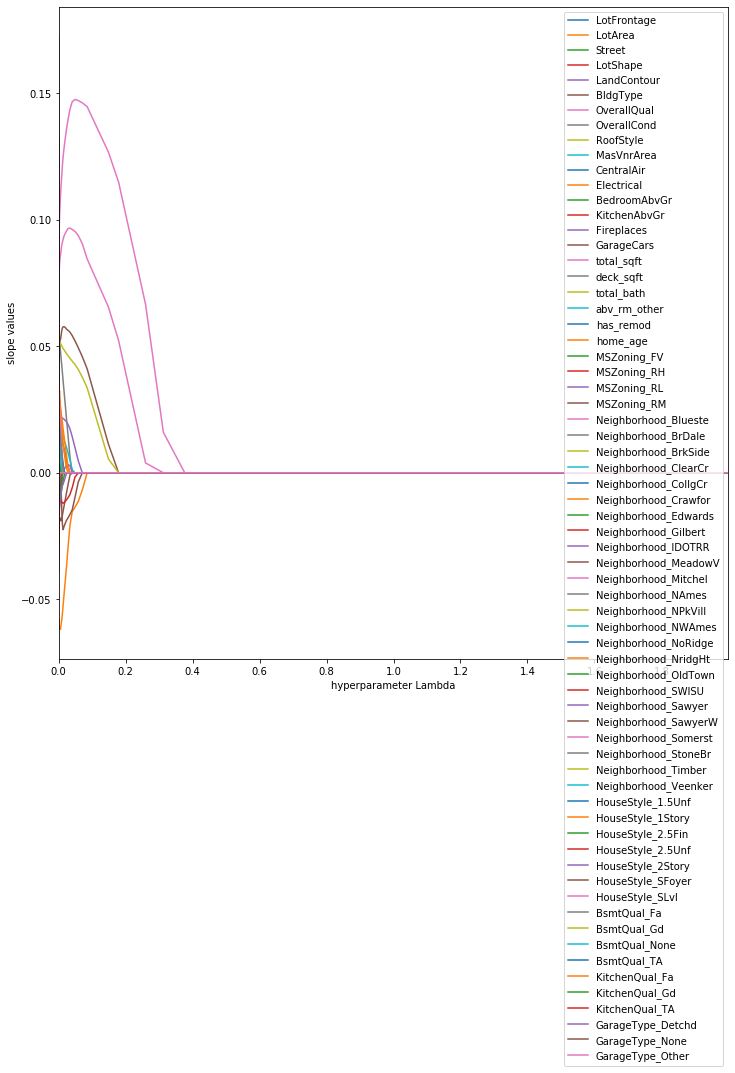

In [81]:
# # Plots the Effect of Lasso on Features

# plt.figure(figsize=(12,12))
# for name in coefs_lasso.columns:
#     plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
# plt.xlabel(r'hyperparameter Lambda')
# plt.ylabel(r'slope values')
# plt.legend(loc=1)
# plt.xlim(0, 2)
# plt.xticks(np.arange(0, 2, 0.2))

**Elastic Net**

In [106]:
elastic = ElasticNet(max_iter=2000)

In [110]:
# # np.logspace(-2, 4, 100)
# # [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
# # np.linspace(0, 1, 100)
# grid_param = [{'alpha' : np.logspace(-2, 4, 1000), 'l1_ratio' : np.arange(0.0, 1.0, 0.1)}]

# #'r2' 'neg_root_mean_squared_error'
# elastic_search = GridSearchCV(estimator = elastic, param_grid = grid_param, scoring = 'neg_mean_squared_error', cv=4 )
# elastic_search = para_search.fit(Xtrain, ytrain)


In [ ]:
print('The best alpha RMSE is: ', np.sqrt(-para_search.best_score_))
print(para_search.best_params_)